## Data Science Internship @ CodesonBytes

Phase 2, Task 3- Analyze the dataset and create graphs using seaborn and matplotlib.

In [1]:
# Importing the necessary libraries:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter('ignore')

In [3]:
# Loading the dataset
dn = pd.read_csv('dataset - netflix1.csv')

In [4]:
# Displaying the first 5 rows of the data:
dn.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [5]:
# Displaying the last five rows of thr data:
dn.tail()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV
8789,s8786,TV Show,YOM,Not Given,Pakistan,6/7/2018,2016,TV-Y7,1 Season,Kids' TV


In [6]:
# Checking the shape of the dataset:
dn.shape

(8790, 10)

In [8]:
# Checking the column names of the given dataset:
dn.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

In [9]:
# Displaying the basic information about the dataset:
dn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [10]:
#Describing the dataset statistically:
dn.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [11]:
#Checking for any duplicate values:  
dn.duplicated().sum()

0

In [12]:
# Checking for missing values:
dn.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

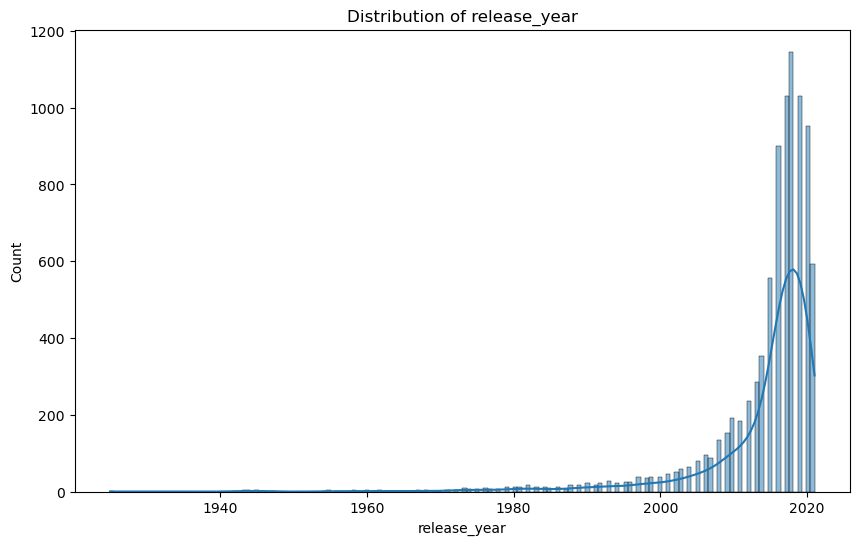

In [16]:
# Visualising the distribution of numerical features:

numerical_columns_dn = dn.select_dtypes(include=[np.number]).columns

# Visualising the distribution of numerical features:

for col in numerical_columns_dn:
    plt.figure(figsize=(10, 6))
    sns.histplot(dn[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

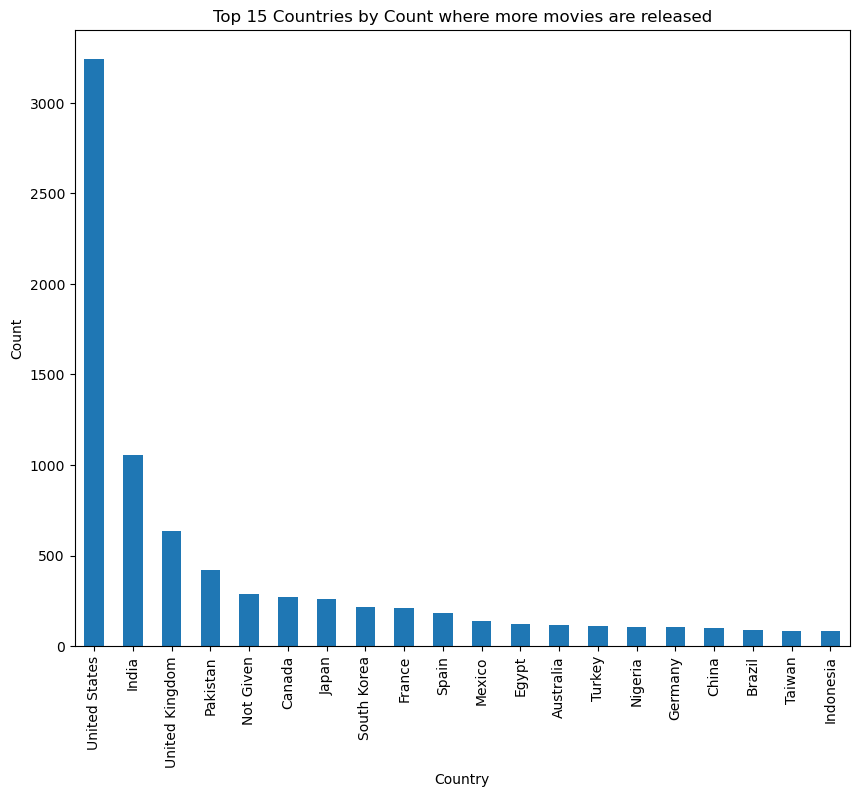

In [17]:
# Top 15 countries where more movies are released.
top_countries_dn = dn['country'].value_counts().head(20)

# Plotting
plt.figure(figsize=(10, 8))
top_countries_dn.plot(kind='bar')
plt.title('Top 15 Countries by Count where more movies are released')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

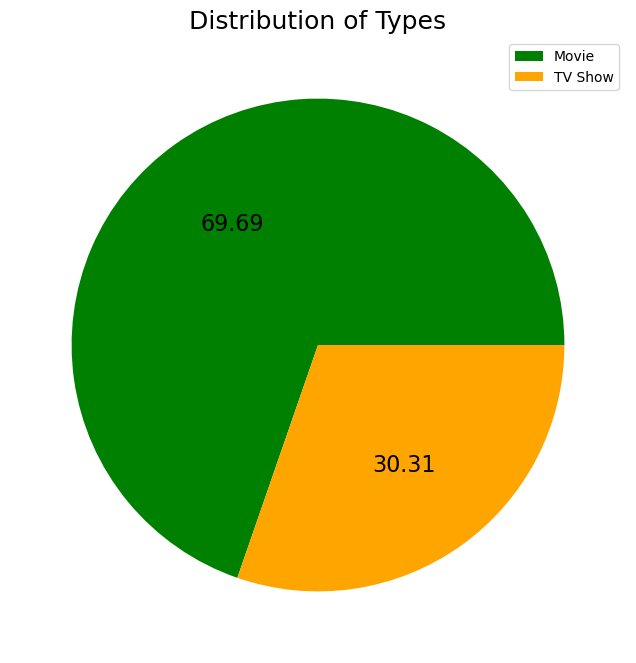

In [20]:
# Distribution of types of release:
plt.figure(figsize=(10, 8))

plt.pie(dn['type'].value_counts(),
        labels=dn['type'].value_counts().index,
        labeldistance=None, autopct="%.2f",
        textprops={'fontsize': 16},
        colors=['green', 'orange'])
plt.title('Distribution of Types', fontsize=18)
plt.legend()
plt.show()

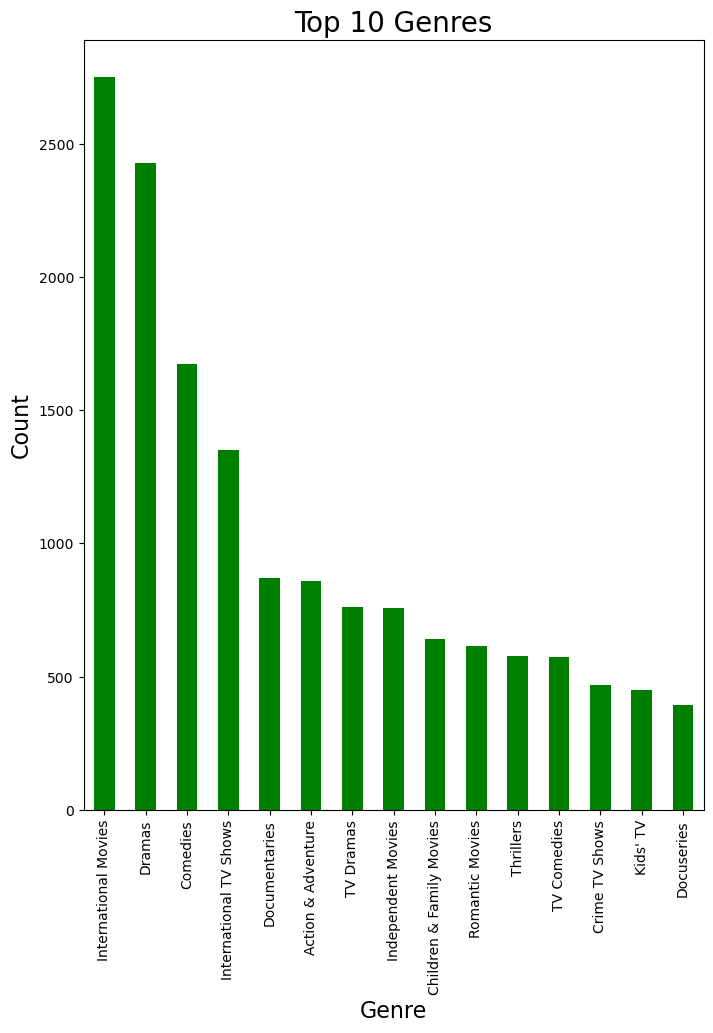

In [22]:
# Top 10 genres:
genres_dn = dn['listed_in'].str.split(', ', expand=True).stack()

# Plotting the top 10 genres
plt.figure(figsize=(8, 10))
genres_dn.value_counts().head(15).plot(kind='bar', color='green')
plt.title('Top 10 Genres', fontsize=20)
plt.xlabel('Genre', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.show()

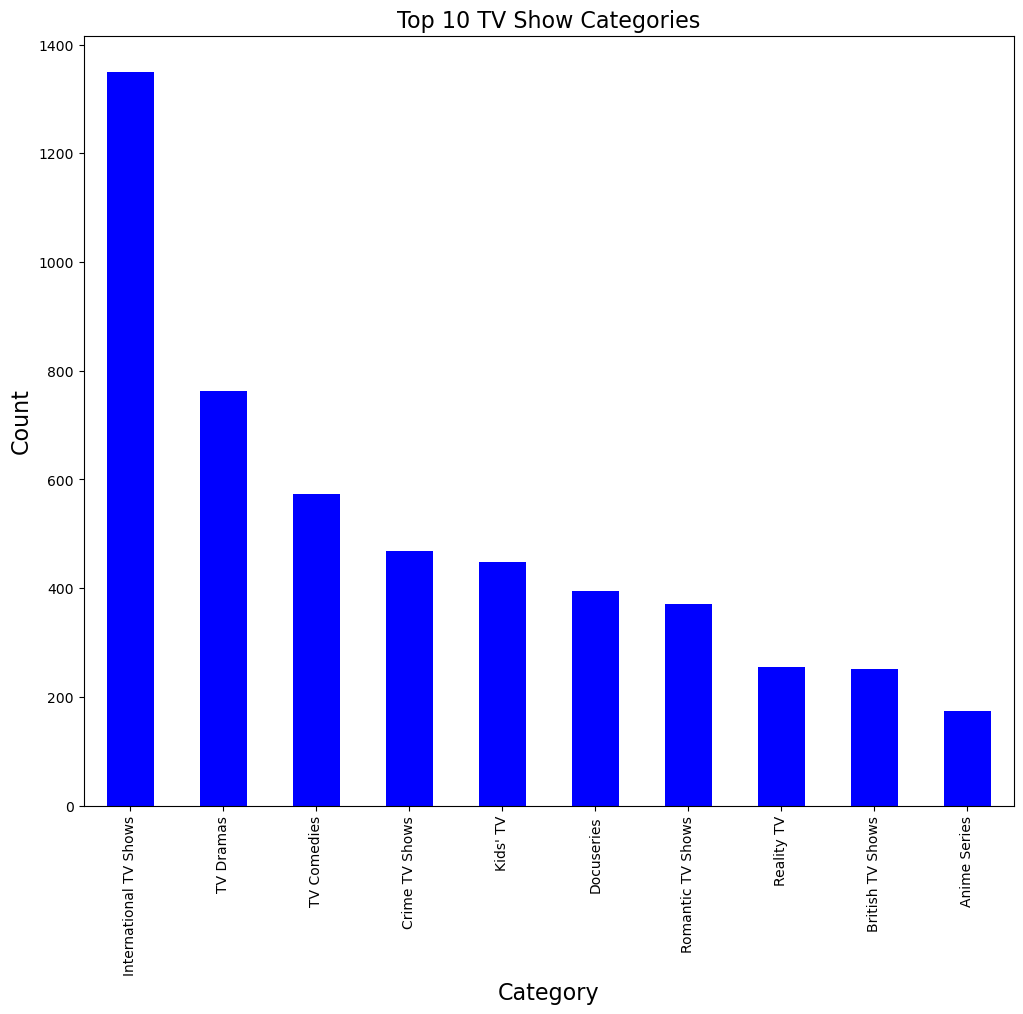

In [23]:
tv_shows = dn[dn['type'] == 'TV Show']

# If 'listed_in' contains multiple categories separated by commas, you might need to split them
categories_dn = tv_shows['listed_in'].str.split(', ', expand=True).stack()

# Plotting the top 10 categories
plt.figure(figsize=(12, 10))
categories_dn.value_counts().head(10).plot(kind='bar', color='blue')
plt.title('Top 10 TV Show Categories', fontsize=16)
plt.xlabel('Category', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.show()

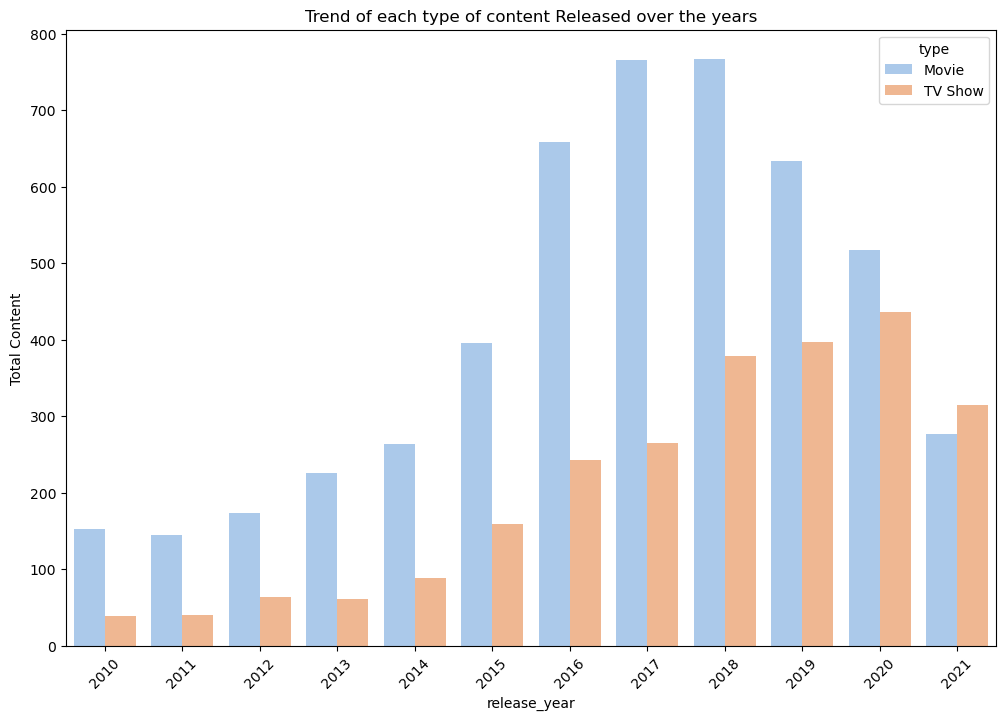

In [24]:
# Trend of each type of content Released over the years
last_decade_dn = dn[["type", "release_year"]]

# Filter for the last decade (2010 and later)
last_decade_dn = last_decade_dn[last_decade_dn["release_year"] >= 2010]

# Group by release year and count the number of each content type
last_decade_dn = last_decade_dn.groupby(["release_year", "type"]).size().reset_index(name="Total Content")

plt.figure(figsize=(12, 8))

# Plotting the count of each content type over the years
count_plot = sns.barplot(x="release_year", y="Total Content", data=last_decade_dn, hue="type", palette="pastel")
count_plot.set(title="Trend of each type of content Released over the years")
count_plot.set_xticklabels(count_plot.get_xticklabels(), rotation=45)  # Rotate x-axis labels for better readability
plt.show()

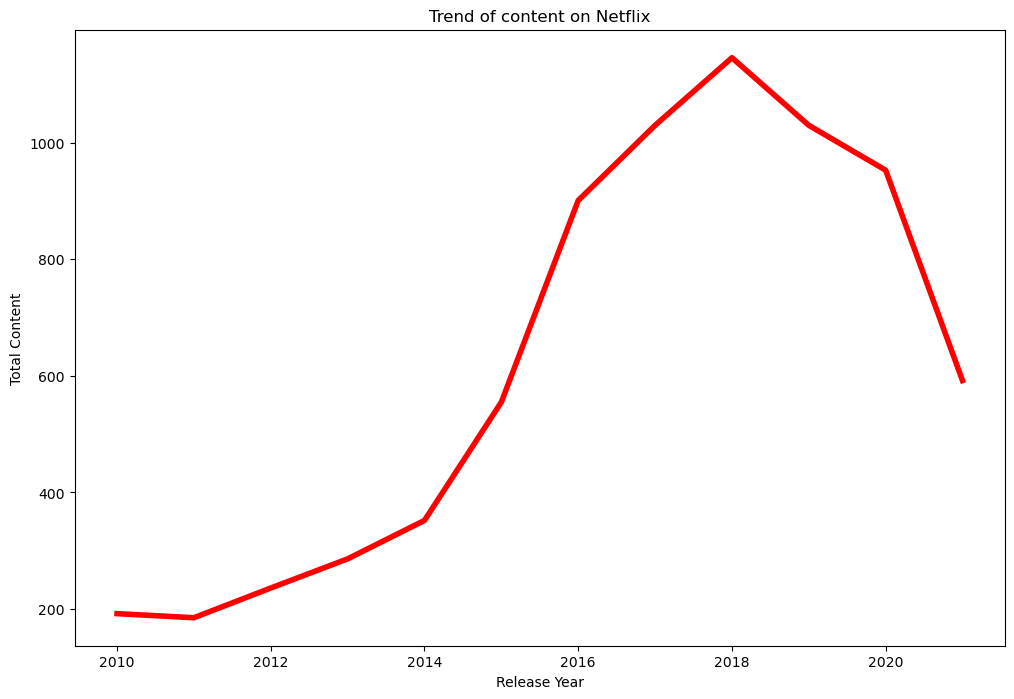

In [25]:
# Trend of content on Netflix
last_decade_dn = dn[["type", "release_year"]]

# Filter for the last decade (2010 and later)
last_decade_dn = last_decade_dn[last_decade_dn["release_year"] >= 2010]

# Group by release year and count the total content
last_decade_dn = last_decade_dn.groupby("release_year")["type"].size().reset_index(name="Total Content")

plt.figure(figsize=(12, 8))

# Plotting the trend of total content over the years
plot_total_content = sns.lineplot(x="release_year", y="Total Content", data=last_decade_dn, linewidth=4, color='r')
plot_total_content.set(xlabel="Release Year", ylabel="Total Content", title="Trend of content on Netflix")
plt.show()


Result: It is seen that most content on netflix was released in year 2018, the amount of content is decreasing since then.

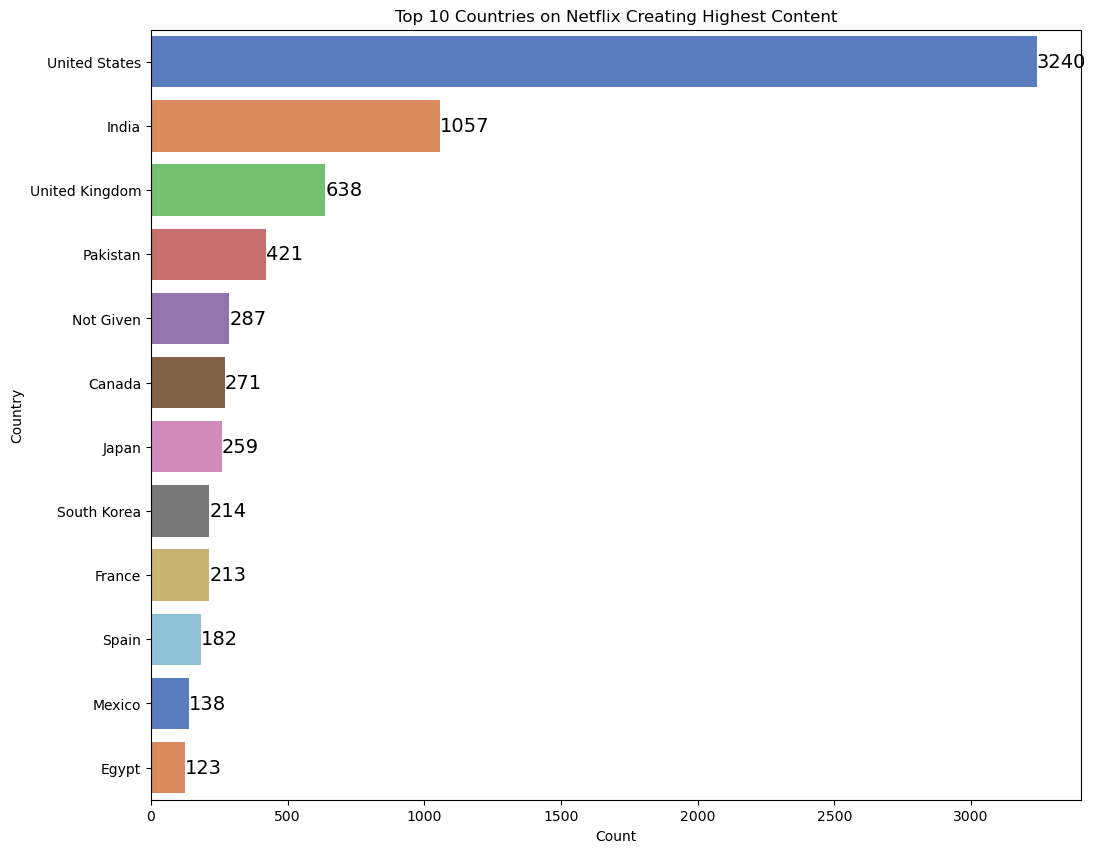

In [26]:
# Top 10 Highest content creater Countries on Netflix:
top_10_countries_dn = dn['country'].value_counts().head(12)
top_10_countries_dn = pd.DataFrame(top_10_countries_dn).reset_index()
top_10_countries_dn.columns = ['Country', 'Count']

plt.figure(figsize=(12, 10))

# Plotting the bar plot
country_plot_dn = sns.barplot(x='Count', y='Country', data=top_10_countries_dn, palette='muted')
country_plot_dn.set(title='Top 10 Countries on Netflix Creating Highest Content', xlabel='Count', ylabel='Country')

# Adding labels on the bars
for i, value in enumerate(top_10_countries_dn['Count']):
    country_plot_dn.text(value, i, f'{value}', ha='left', va='center', fontsize=14)

plt.show()

Result: Most of the content on Netflix is produced in the USA followed by India and UK.

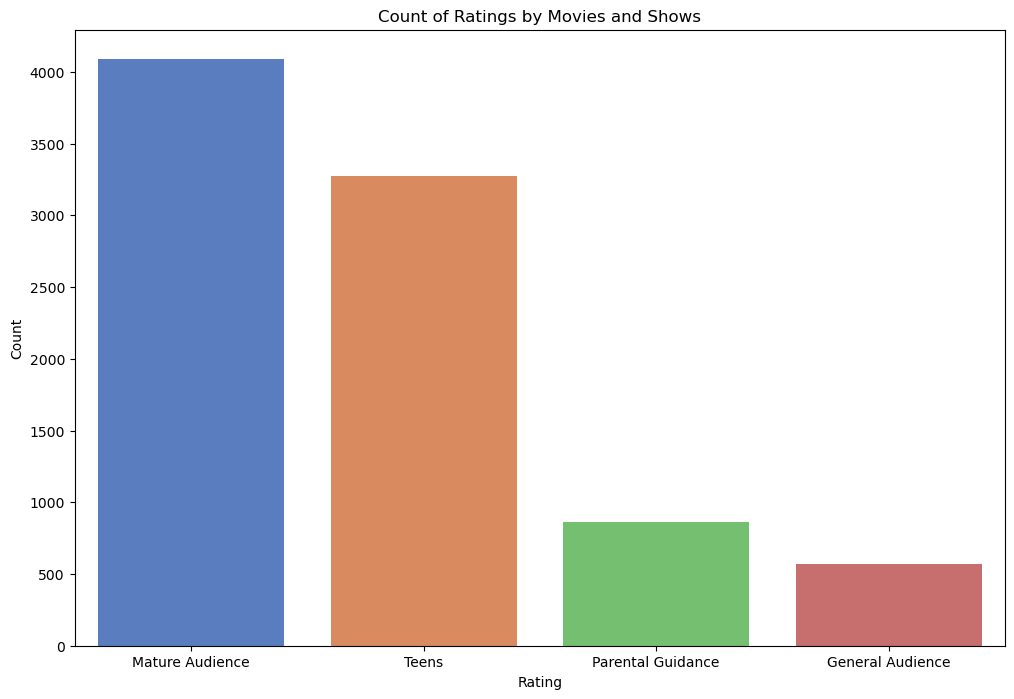

In [28]:
# Count of Ratings by Movies and Shows
new_catgs_dn = {
    'TV-PG': 'Parental Guidance',
    'TV-MA': 'Mature Audience',
    'TV-Y7-FV': 'Teens',
    'TV-Y7': 'Teens',
    'TV-14': 'Teens',
    'R': 'Mature Audience',
    'TV-Y': 'General Audience',
    'NR': 'Mature Audience',
    'PG-13': 'Teens',
    'TV-G': 'General Audience',
    'PG': 'Teens',
    'G': 'General Audience',
    'UR': 'Mature Audience',
    'NC-17': 'Mature Audience'
}

dn['rating'] = dn['rating'].replace(new_catgs_dn)

plt.figure(figsize=(12, 8))

# Plotting the count of Rating by Movies and Shows
sns.countplot(x="rating", data=dn, palette="muted", order=dn['rating'].value_counts().index)

plt.title("Count of Ratings by Movies and Shows")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

Result: It is seen that Netflix has more content for Mature audience.

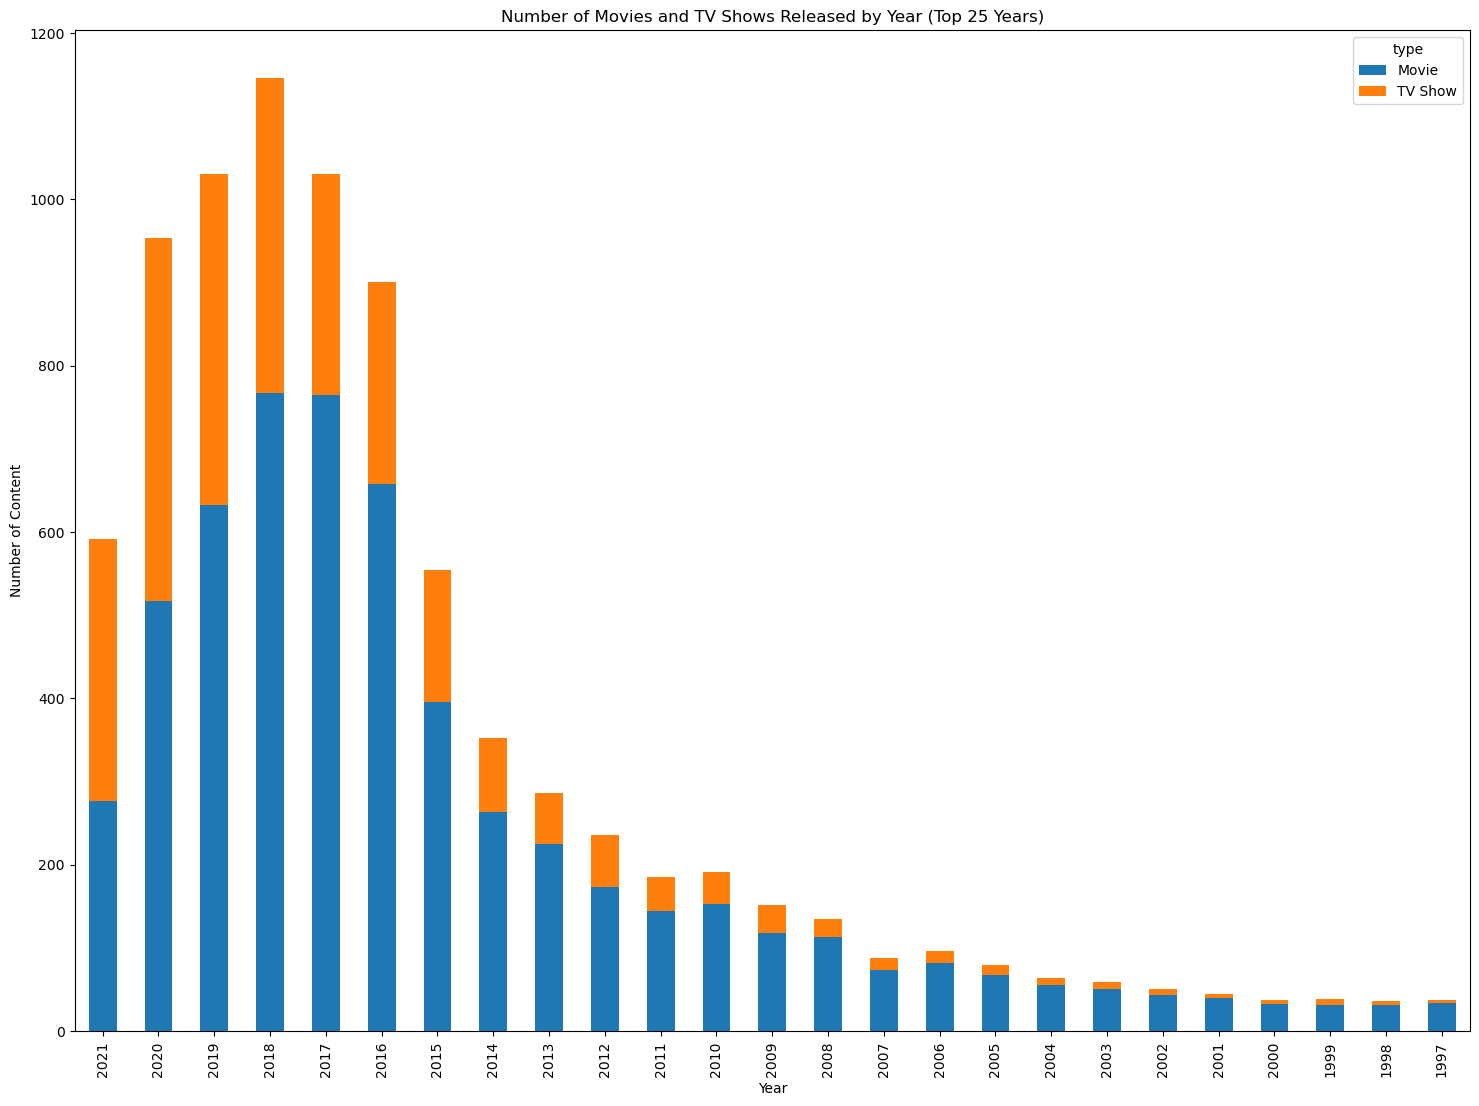

In [29]:
# Number of Movies and TV Shows Released by Year (Top 25 Years)
dn_top25 = dn.groupby(['type', 'release_year']).size().unstack().transpose().fillna(0).sort_values(by='release_year', ascending=False)

# Plotting the top 25 years with a stacked bar plot
dn_top25.head(25).plot.bar(stacked=True, figsize=(18, 13))

plt.title('Number of Movies and TV Shows Released by Year (Top 25 Years)')
plt.xlabel('Year')
plt.ylabel('Number of Content')
plt.show()

In [ ]:
Result: Highest number of movies are released in 2018 and afterwards there is a downwards trend with increasing year.

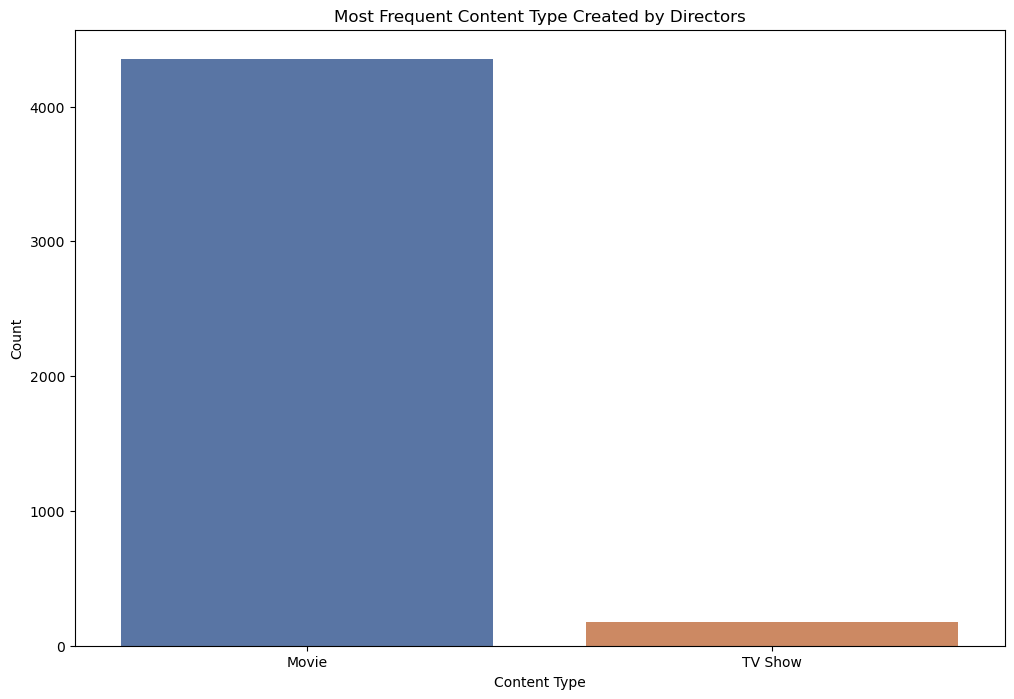

In [30]:
# Most Frequent Content Type created by Directors:
data_dn = dn[dn['director'] != 'Unknown']
director_type_counts_dn = data_dn.groupby(['director', 'type']).size().unstack().fillna(0)

# Find the most frequent type for each director
director_most_frequent_type_dn = director_type_counts_dn.idxmax(axis=1)

plt.figure(figsize=(12, 8))

# Plotting the count of the most frequent type for directors
sns.countplot(x=director_most_frequent_type_dn, palette='deep')
plt.title('Most Frequent Content Type Created by Directors')
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.show()

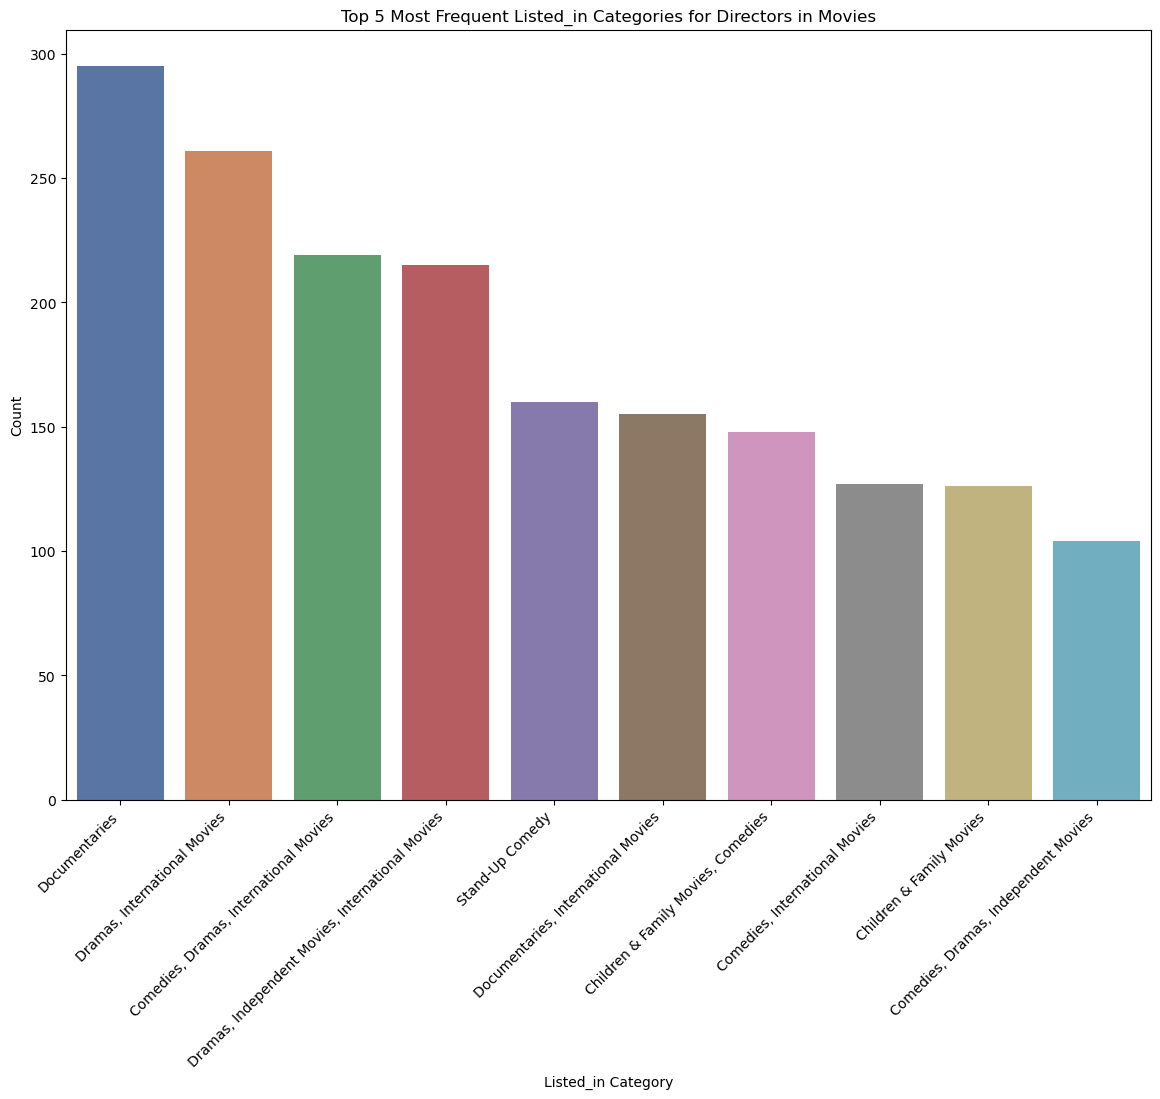

In [31]:
# Top 5 Most Frequent Listed_in Categories for Directors in Movies
data_dn = dn[dn['director'] != 'Unknown']
movies_data_dn = data_dn[data_dn['type'] == 'Movie']

# Find the most frequent listed_in category for each director in movies
director_movie_category_counts_dn = movies_data_dn.groupby(['director', 'listed_in']).size().unstack().fillna(0)
director_most_frequent_category_dn = director_movie_category_counts_dn.idxmax(axis=1)

# Select the top 5 most frequent categories
top_5_categories_dn = director_most_frequent_category_dn.value_counts().head(10)

plt.figure(figsize=(14, 10))

# Plotting the count of the top 5 most frequent listed_in categories for directors in movies
sns.barplot(x=top_5_categories_dn.index, y=top_5_categories_dn.values, palette='deep')
plt.title('Top 5 Most Frequent Listed_in Categories for Directors in Movies')
plt.xlabel('Listed_in Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

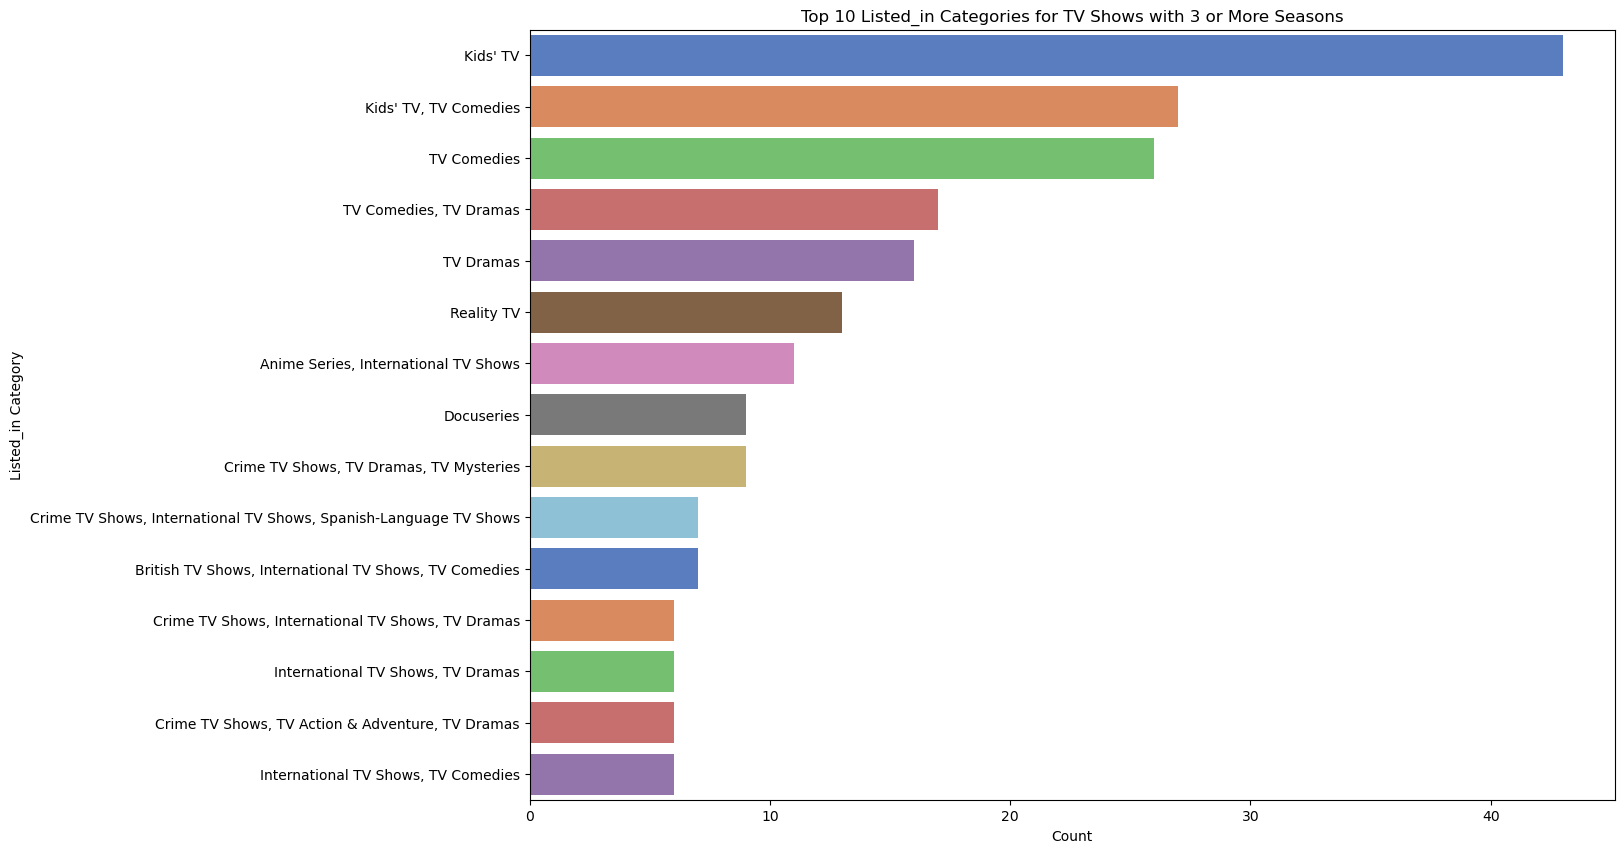

In [33]:
# Top 10 Listed_in Categories for TV Shows with 3 or More Seasons

# Convert 'duration' column to numeric (extracting the numeric part)
dn['duration_numeric'] = pd.to_numeric(dn['duration'].str.extract('(\d+)', expand=False), errors='coerce')

# Selecting TV Shows with 3 or more seasons
shows_with_3_or_more_seasons_dn = dn[(dn['type'] == 'TV Show') & (dn['duration_numeric'] >= 3)]['listed_in'].sort_values()

# Selecting the top 10 listed_in categories
top_10_categories_dn = shows_with_3_or_more_seasons_dn.value_counts().head(15)

plt.figure(figsize=(14, 10))

# Plotting the distribution of the top 10 listed_in categories for TV Shows with 3 or more seasons
sns.barplot(y=top_10_categories_dn.index, x=top_10_categories_dn.values, palette='muted')
plt.title('Top 10 Listed_in Categories for TV Shows with 3 or More Seasons')
plt.xlabel('Count')
plt.ylabel('Listed_in Category')
plt.show()

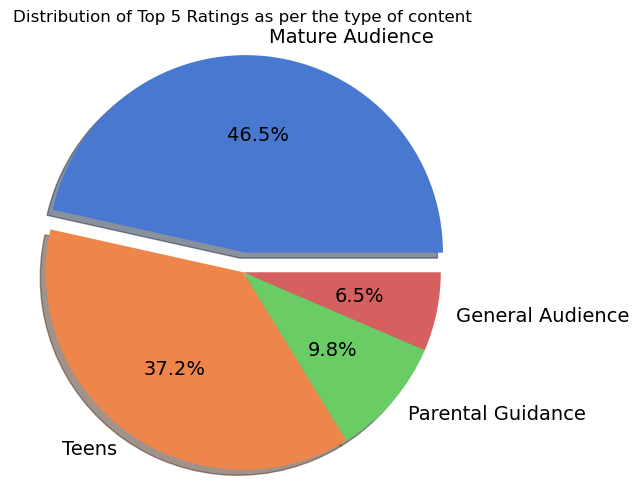

In [37]:
# Distribution of Top 5 Ratings as per the type of content
plt.figure(figsize=(6, 6))

# Get the top 5 ratings
top_5_ratings_dn = dn['rating'].value_counts().index[:6]

# Create a pie chart for the top 5 ratings
sizes_dn = dn['rating'].value_counts().sort_index().loc[top_5_ratings_dn]
labels_dn = sizes_dn.index

# Dynamically adjust the 'explode' parameter based on the length of 'sizes'
explode_dn = tuple(0.1 if i == 0 else 0 for i in range(len(sizes_dn)))

plt.pie(sizes_dn, explode=explode_dn, labels=labels_dn, shadow=True, autopct='%1.1f%%', textprops={'fontsize': 14}, colors=sns.color_palette('muted'))
plt.title('Distribution of Top 5 Ratings as per the type of content')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.

plt.show()

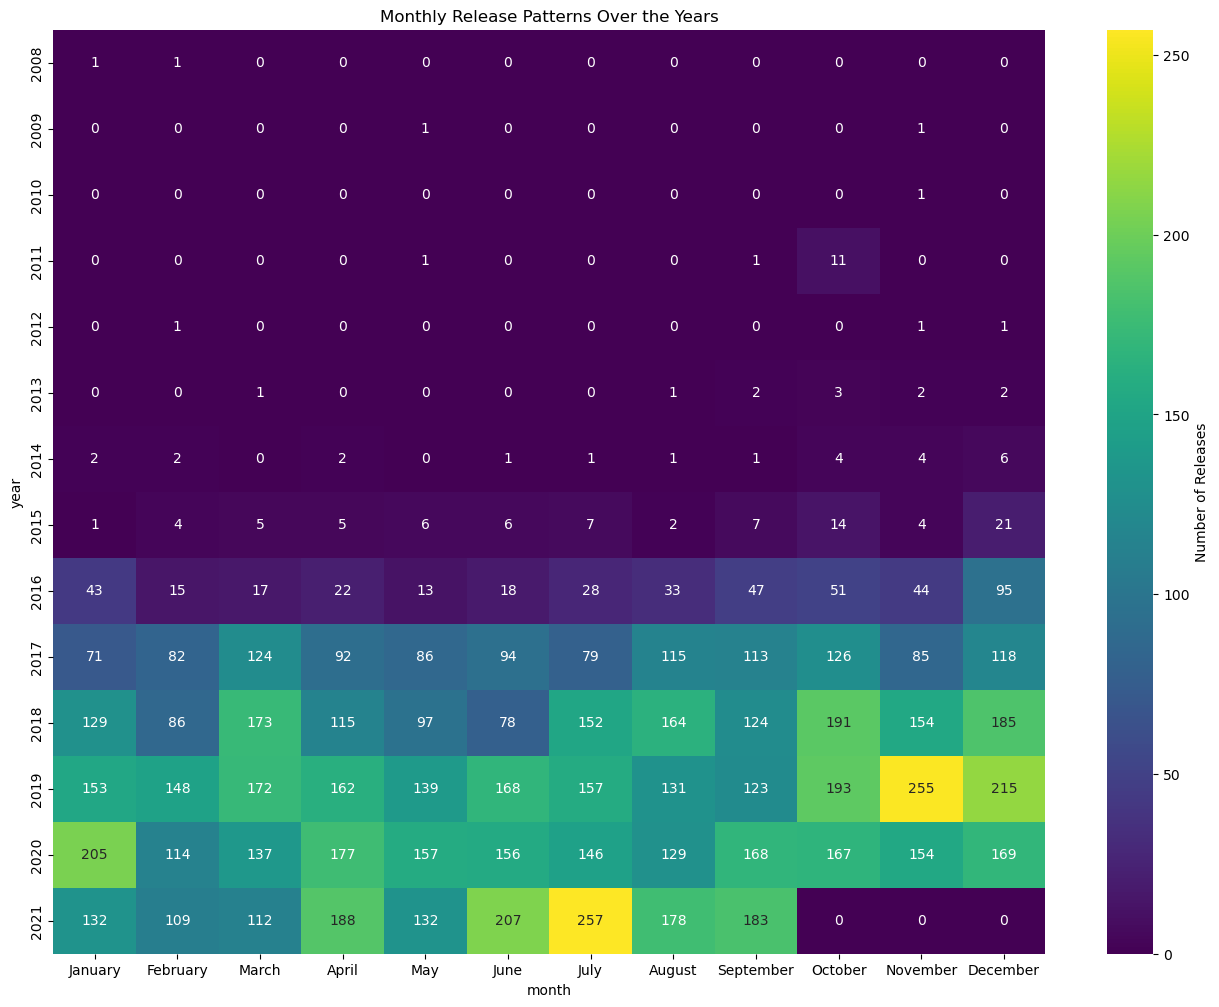

In [41]:
# Monthly Release Patterns Over the Years
dn['date_added'] = pd.to_datetime(dn['date_added'])  # Convert 'date_added' to datetime
dn['month'] = dn['date_added'].dt.month_name()
dn['year'] = dn['date_added'].dt.year

# Group by year and month and create a heatmap
dn_hn = dn.groupby(['year', 'month']).size().unstack().fillna(0)
month_order_dn = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(16, 12))
sns.heatmap(dn_hn[month_order_dn], cmap='viridis', annot=True, fmt='g', cbar_kws={'label': 'Number of Releases'})
plt.title('Monthly Release Patterns Over the Years')
plt.show()

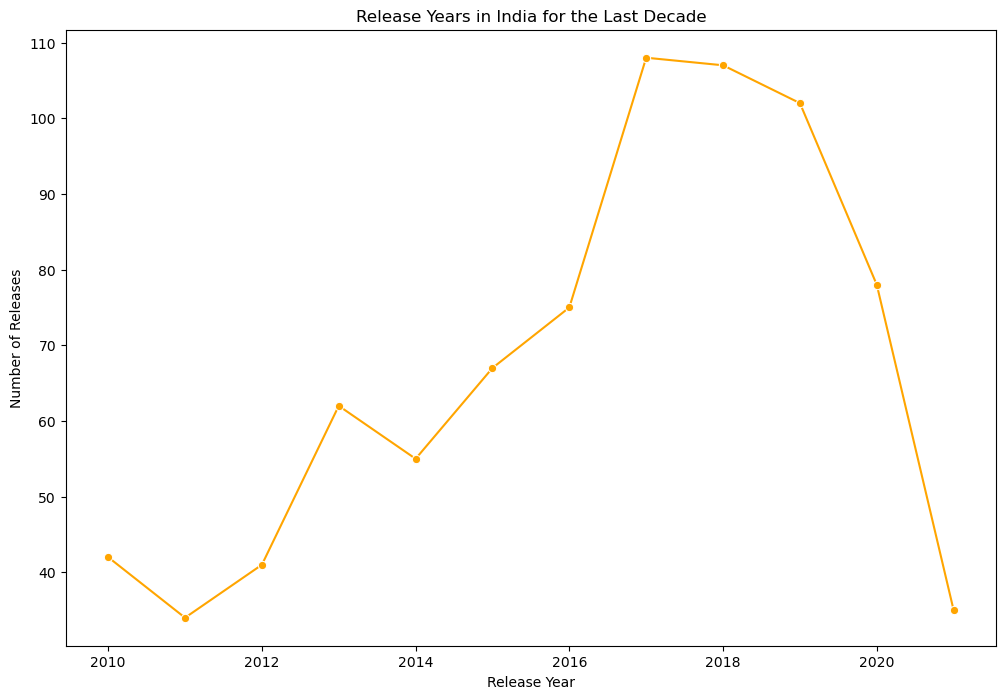

In [43]:
# Release Years in India for the Last Decade
india_last_decade_data_dn = dn[(dn['country'] == 'India') & (dn['release_year'] >= 2010)]['release_year'].value_counts().sort_index()

plt.figure(figsize=(12, 8))
sns.lineplot(x=india_last_decade_data_dn.index, y=india_last_decade_data_dn.values, marker='o', color='orange')
plt.title('Release Years in India for the Last Decade')
plt.xlabel('Release Year')
plt.ylabel('Number of Releases')
plt.show()

Result: In India , highest number of releases were in 2018 , then there is a downwards trend.

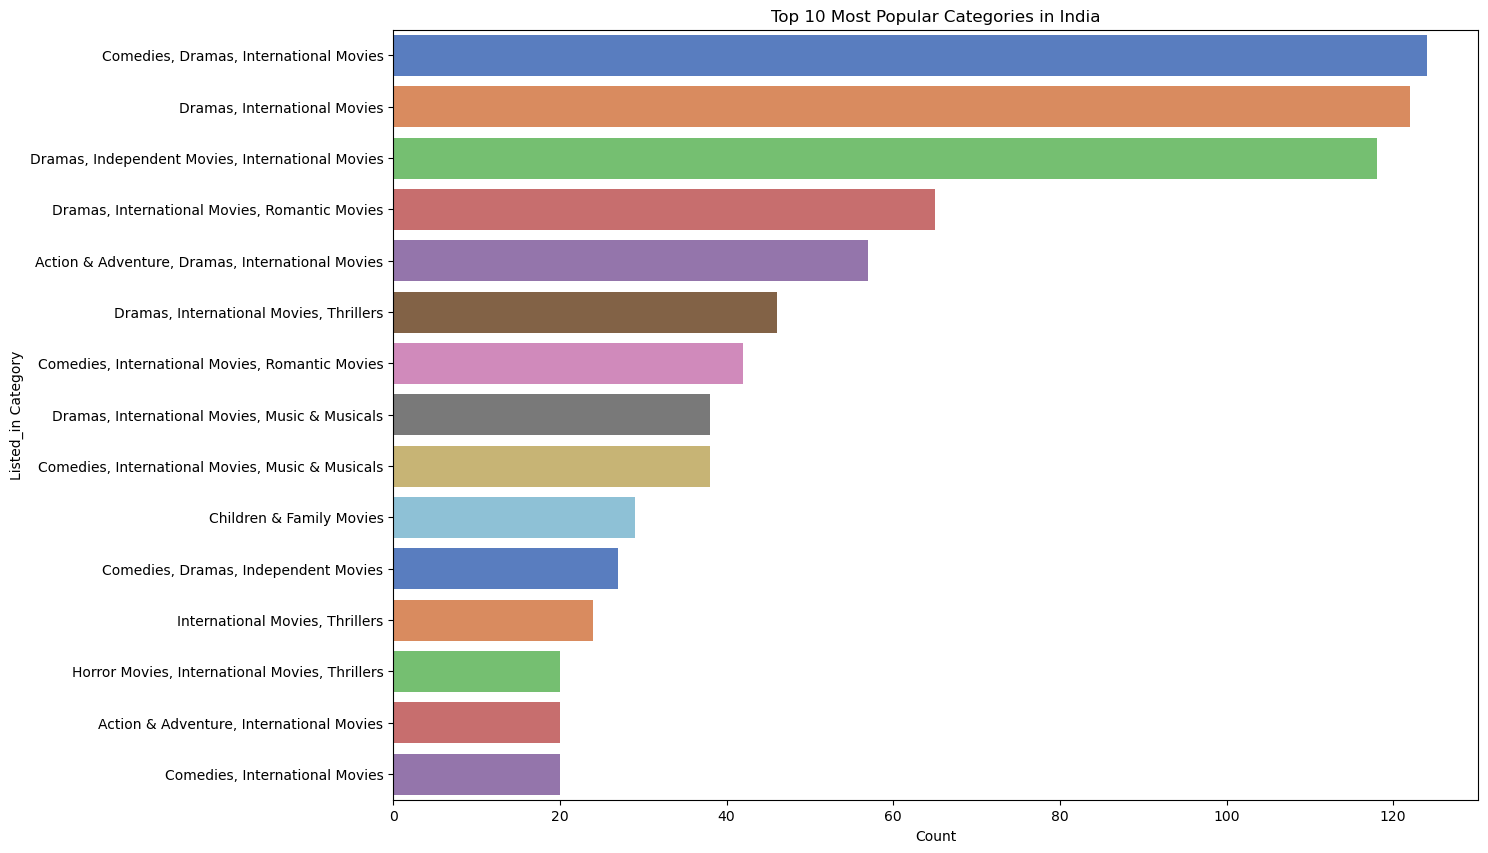

In [44]:
# Top 10 Most Popular Categories in India
indian_data_dn = dn[dn['country'] == 'India']

# Get the top 10 most popular categories
top_categories_dn = indian_data_dn['listed_in'].value_counts().sort_values(ascending=False).head(15)

# Plotting the data
plt.figure(figsize=(14, 10))
sns.barplot(x=top_categories_dn.values, y=top_categories_dn.index, palette='muted')
plt.title('Top 10 Most Popular Categories in India')
plt.xlabel('Count')
plt.ylabel('Listed_in Category')
plt.show()

Thank You!